### **Project 4: Gold Price Prediction**

Predict gold price based on various stock prices using Random Forest Regressor

Work Flow : Gold Price Data --> Data Pre-Processing --> Data Analysis --> Train Test Solit --> Random Forest Regressor -- > Evaluation of Model

Importing the Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame

gold_data = pd.read_csv('/content/gld_price_data.csv')


In [6]:
# print first 5 rows in the data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# the prices are from 2008, let us till which year we have data
gold_data.tail() # last year is 2018

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# no of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
# getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

if gold price increases and usd price also increases then they are negatively co - related
if one increases and other decreases then they are negatively correlated

In [12]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

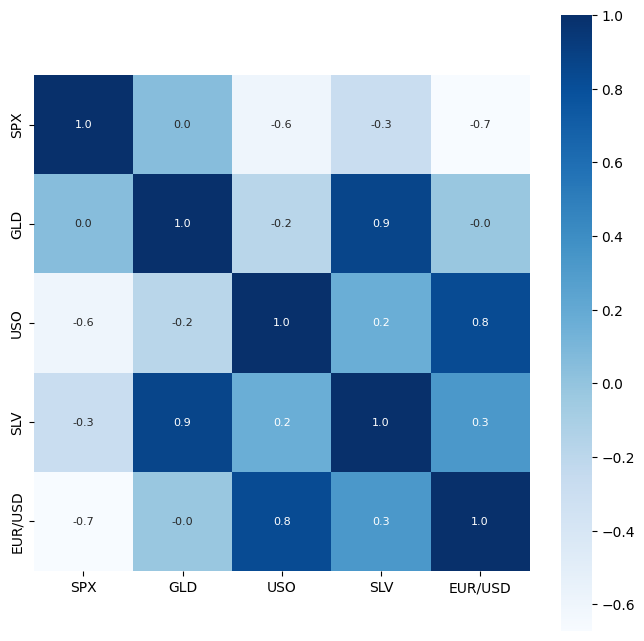

In [16]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar  = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')
# negative correlation has negative value and positive has positive values on the box
# cbar is color bar
# fmt .1 means the no of decimal points we want
# annot True means having annotations of column name on the leftmost side
# annot_kws means gicving size of these annotations
# cmap means the color of plot

In [17]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-228/2162396663.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'purple') # most of the values lie within 120 range


<Axes: xlabel='GLD', ylabel='Density'>

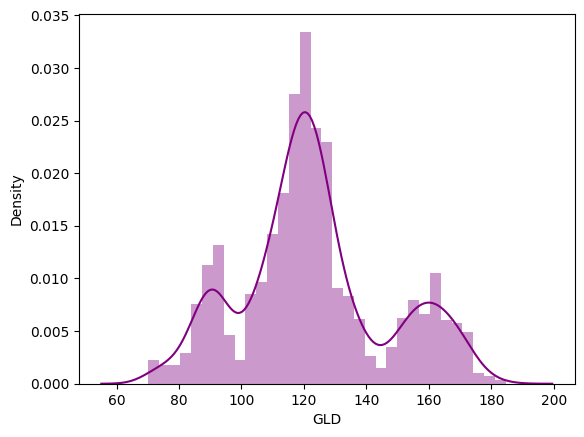

In [19]:
# checking the distribution of the gold price
sns.distplot(gold_data['GLD'], color = 'purple') # most of the values lie within 120 range

Splitting the Features and Target

In [20]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model Training

Random Forest Regressor consists is an ensamble model meaning it consists of more than one models joined together so it is a non-symbol model of decision tree, it works naded on the range of values, if the value is in a perticular range it will go towards it branch in the tree, this is how decision tree works, but random forest has multiple  decision trees, we will get different values from different decision trees, at the end it performs majority voting or averaging to compute the final results out of these multiple results

In [24]:
regressor = RandomForestRegressor(n_estimators = 100)

In [25]:
# training the model
regressor.fit(X_train, Y_train) # X train has all the features and Y train has the gold price of those corresponding values in x train

RandomForestRegressor()

Model Evaluation

In [26]:
# prediction on test data

test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.6612993   81.80089999 116.07710016 127.74670076 120.53160135
 154.80219736 150.11029842 125.99400009 117.47369848 126.03190042
 116.51080149 171.38730074 141.41779879 167.90069867 115.36679976
 117.73870033 139.47990327 170.26280095 159.20190299 160.22469948
 155.13050041 125.18800018 176.33070002 156.74180316 125.22670048
  94.01979934  78.32049995 120.24870004 119.05069921 167.51629962
  88.16610012 125.21730032  91.32760059 117.62930053 121.1382991
 136.0111005  115.46890089 115.19680081 146.71399886 107.22670082
 104.41370267  87.20639811 126.45090069 117.93890018 154.51209885
 119.66079979 108.35109992 107.98199809  93.16040055 127.22699743
  74.25450071 113.64949908 121.1097997  111.33439926 118.85329887
 120.56049928 158.92419963 168.69500121 147.24989682  85.65899813
  94.21610018  86.88029907  90.6165002  118.9197008  126.47440061
 127.50540013 169.41759987 122.3571995  117.31929896  98.37159998
 167.98430106 142.88509814 132.46120235 121.24290245 121.45409954
 119.686300

In [28]:
# Comparing predicted values with actual values using R squares error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score) # in neural networks and recurrent neural network the error score will be more less

R squared error :  0.9894386060997497


Compare the actual values and predicted values using a plot

[]

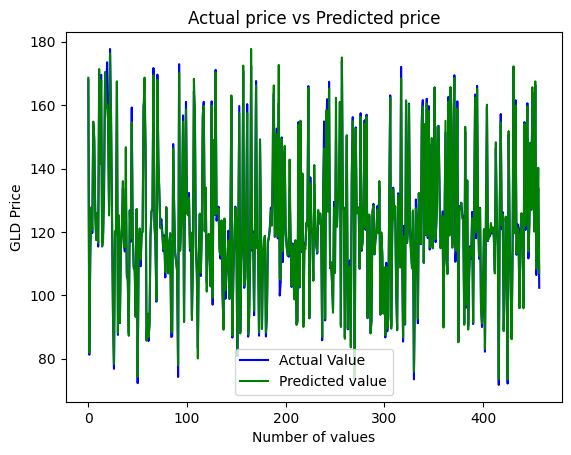

In [29]:
Y_test_list = list(Y_test)
plt.plot(Y_test_list,color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted value')
plt.title("Actual price vs Predicted price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.plot() # the values are close